In [78]:
from __future__ import division
import pandas as pd
import numpy as np
from analytics_tools.analytics_tools3 import freq_discrete
pd.set_option('display.max_columns',500)

In [79]:
df = pd.read_csv('Datos/2016-new-coder-survey-/2016-FCC-New-Coders-Survey-Data.csv')

In [80]:
var = ['Age','BootcampMonthsAgo','BootcampPostSalary',
'ChildrenNumber','CommuteTime','ExpectedEarning','HoursLearning',
'HomeMortgageOwe','Income','MoneyForLearning','MonthsProgramming',
'StudentDebtOwe']


In [81]:
df = df[var]

In [82]:
aux = df.describe().T[['count']]
aux/=len(df) 
aux=1-aux

In [83]:
var_fin = list(aux[aux['count']<=0.3].reset_index()['index'])

In [84]:
var_fin

['Age', 'HoursLearning', 'MoneyForLearning', 'MonthsProgramming']

In [85]:
df = df[var_fin
       ]

In [86]:
df.head()

,Age,HoursLearning,MoneyForLearning,MonthsProgramming
0,28.0,30.0,0.0,1.0
1,22.0,30.0,20.0,2.0
2,19.0,20.0,50.0,24.0
3,26.0,20.0,100.0,3.0
4,20.0,25.0,1300.0,48.0


In [87]:
var_ol = [x for x in var_fin if x != 'MoneyForLearning']

In [88]:
aux = df[var_ol].describe(percentiles=[0.01,0.99]).T[['1%','99%']]

In [89]:
aux.reset_index(inplace=True)

In [90]:
aux

,index,1%,99%
0,Age,15.0,57.0
1,HoursLearning,1.0,70.0
2,MonthsProgramming,0.0,240.0


In [91]:
for i,row in aux.iterrows():
    df['ol_%s'%row['index']] = ((df[row['index']]<row['1%'])|
     (df[row['index']]>row['99%'])).astype(int)

In [92]:
var_ol = [x for x in df.columns if x[:2]=='ol']

In [93]:
df ['ol'] = (df[var_ol].sum(axis=1)>=1).astype(int)

In [94]:
freq_discrete(df,'ol')

Frequency distribution table for variable: ol


    Freq       Pct  Accum Freq  Accum Pct
0  15029  0.962164       15029   0.962164
1    591  0.037836       15620   1.000000




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f1afd9bd0>,
      dtype=object)

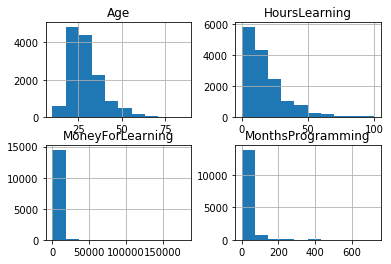

In [95]:
df[var_fin].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f1b53fb90>,
      dtype=object)

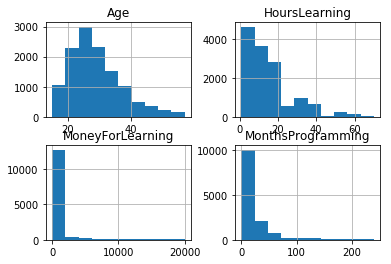

In [96]:
df[(df.ol!=1)&(df.MoneyForLearning<=20000)][var_fin].hist()

In [100]:
df_final = df[(df.ol!=1)&(df.MoneyForLearning<=20000)][var_fin].copy()

In [101]:
len(df_final)/len(df)

0.9001280409731114

In [104]:
from sklearn.preprocessing import Imputer

In [105]:
im = Imputer(strategy='median')

In [106]:
im.fit(df_final)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [109]:
df = pd.DataFrame(im.transform(df_final),columns=df_final.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f1b2f4ad0>,
      dtype=object)

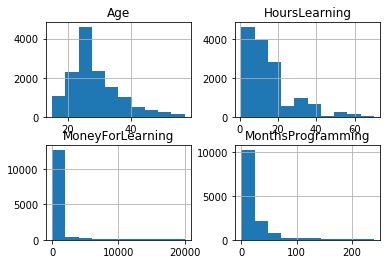

In [113]:
df.hist()

In [115]:
df.to_excel('Datos/encuesta_coders_limpio.xlsx',index=False)